In [1]:
import pandas as pd
from scipy import stats as sps
import seaborn as sns
sns.set_theme()
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from unidecode import unidecode
from sklearn.impute import KNNImputer
plt.style.use('seaborn')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 40
pd.options.display.float_format = '{:,.2f}'.format

C:\Users\48504\AppData\Local\Temp\ipykernel_32696\3963498875.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
URL = "oto_dom_wroclaw_30_10_2023"

In [3]:
# Load data
df = pd.read_csv(URL, sep=",", encoding="utf-8")

In [4]:
# Display 5 first rows
df.head()

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,balcon_garden_terrace,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,lift,utilities,security,home_furnishings,additional_info,bulding_material,describe
0,3 pokoje z zielonym tarasem i balkonem + MP,759000,"['Maślice', 'Fabryczna', 'Wrocław', 'dolnośląs...","61,83",12276,3,https://www.otodom.pl/pl/oferta/3-pokoje-z-zie...,pełna własność,do zamieszkania,parter/2,"balkon, taras",Zapytaj,garaż/miejsce parkingowe,kotłownia,wtórny,prywatny,2019,blok,plastikowe,tak,internet,"drzwi / okna antywłamaniowe, teren zamknięty, ...","zmywarka, lodówka, meble, piekarnik, kuchenka,...",brak informacji,brak informacji,Mam przyjemność przedstawić Państwu ofertę spr...
1,Maślicka 166 C | mieszkanie K2_2,616161,"['ul. Maślicka 166', 'Maślice', 'Fabryczna', '...","67,71",9100,3,https://www.otodom.pl/pl/oferta/maslicka-166-c...,pełna własność,do wykończenia,parter/2,ogródek,Zapytaj,garaż/miejsce parkingowe,gazowe,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,Kancelaria Insolwencyjna sp. z o.o. we Wrocław...
2,Bezpieczna/dwustronne/rozkład/co miejskie/piwnica,576000,"['Bezpieczna okolice', 'Różanka', 'Psie Pole',...","57,7",9983,3,https://www.otodom.pl/pl/oferta/bezpieczna-dwu...,pełna własność,do zamieszkania,4/4,Zapytaj,Zapytaj,Zapytaj,miejskie,wtórny,biuro nieruchomości,1980,blok,plastikowe,nie,"internet, telefon","drzwi / okna antywłamaniowe, domofon / wideofon",meble,"piwnica, oddzielna kuchnia",brak informacji,Trzy pokoje w pełnym rozkładzie!Możliwość prze...
3,Piłsudskiego/ super/ m. miejskie/ balkon /piwnica,470000,"['ul. marsz. Józefa Piłsudskiego', 'Przedmieśc...",40,11750,1,https://www.otodom.pl/pl/oferta/pilsudskiego-s...,Zapytaj,do zamieszkania,3/4,balkon,Zapytaj,Zapytaj,miejskie,wtórny,biuro nieruchomości,1969,blok,brak informacji,tak,"internet, telefon",brak informacji,meble,"piwnica, oddzielna kuchnia",brak informacji,Do sprzedania duża kawalerka z balkonem w cent...
4,"Mieszkanie, 61 m², Wrocław",633000,"['Tarnogaj', 'Krzyki', 'Wrocław', 'dolnośląskie']",61,10377,3,https://www.otodom.pl/pl/oferta/mieszkanie-61-...,pełna własność,do wykończenia,2/4,balkon,Zapytaj,garaż/miejsce parkingowe,miejskie,wtórny,biuro nieruchomości,2022,apartamentowiec,plastikowe,tak,brak informacji,system alarmowy,brak informacji,piwnica,cegła,| Drzwi wejściowe w najwyższej klasie - C - od...


In [5]:
# Display 5 last rows of data
df.tail()

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,balcon_garden_terrace,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,lift,utilities,security,home_furnishings,additional_info,bulding_material,describe
7840,Mieszkanie trzypokojowe w rewelacyjnej lokaliz...,815005,"['ul. Wesoła', 'Huby', 'Krzyki', 'Wrocław', 'd...","70,87",11500,3,https://www.otodom.pl/pl/oferta/mieszkanie-trz...,pełna własność,do zamieszkania,1/3,balkon,Zapytaj,Zapytaj,gazowe,wtórny,prywatny,1906,kamienica,plastikowe,nie,"telewizja kablowa, internet, telefon",domofon / wideofon,"zmywarka, lodówka, meble, piekarnik, kuchenka,...","piwnica, oddzielna kuchnia",cegła,Sprzedam trzypokojowe mieszkanie w bardzo dobr...
7841,"Okazja, ul. Rydygiera 82m2, 4 pokoje, 2 łazienki!",1222000,"['ul. Ludwika Rydygiera', 'Nadodrze', 'Śródmie...",82,14902,4,https://www.otodom.pl/pl/oferta/okazja-ul-rydy...,pełna własność,do zamieszkania,3/3,balkon,1 000 zł,Zapytaj,Zapytaj,wtórny,biuro nieruchomości,2011,brak informacji,plastikowe,nie,brak informacji,brak informacji,meble,brak informacji,brak informacji,Zapraszamy do odkrycia wyjątkowej oferty miesz...
7842,ładne 2 pokojowe,489000,"['ul. Jedności Narodowej', 'Ołbin', 'Śródmieśc...",54,9056,2,https://www.otodom.pl/pl/oferta/ladne-2-pokojo...,pełna własność,do zamieszkania,4/5,Zapytaj,Zapytaj,Zapytaj,miejskie,wtórny,biuro nieruchomości,1930,kamienica,brak informacji,nie,brak informacji,brak informacji,brak informacji,brak informacji,cegła,Do sprzedaży śliczne 2 pokojowe mieszkanie o p...
7843,Penthouse z widokiem na miasto - Wysoki Standard!,1488000,"['ul. Długa', 'Nadodrze', 'Śródmieście', 'Wroc...","79,19",18790,2,https://www.otodom.pl/pl/oferta/penthouse-z-wi...,pełna własność,do zamieszkania,8/8,taras,Zapytaj,Zapytaj,miejskie,wtórny,biuro nieruchomości,2010,blok,brak informacji,tak,internet,"teren zamknięty, monitoring / ochrona",brak informacji,pom. użytkowe,silikat,Wrocław. Długa. Dwupokojowy apartament z taras...
7844,Lokal mieszkalny i działka,"471850,40","['Przedmieście Świdnickie', 'Stare Miasto', 'W...","55,45",8509,3,https://www.otodom.pl/pl/oferta/lokal-mieszkal...,Zapytaj,Zapytaj,parter,Zapytaj,Zapytaj,Zapytaj,Zapytaj,wtórny,prywatny,brak informacji,blok,brak informacji,nie,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,Syndyk Izabeli Sowińskiej osoby fizycznej niep...


In [6]:
# Display 10 random rows of data
df.sample(10)

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,balcon_garden_terrace,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,lift,utilities,security,home_furnishings,additional_info,bulding_material,describe
1192,"2 Pokoje z balkonem, Tramwaj, Zieleń, Garaż /B...",469500,"['Poświętne', 'Psie Pole', 'Wrocław', 'dolnośl...","36,68",12800,2,https://www.otodom.pl/pl/oferta/2-pokoje-z-bal...,pełna własność,Zapytaj,2/4,"balkon, taras",Zapytaj,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2025,brak informacji,plastikowe,tak,"telewizja kablowa, internet, telefon","system alarmowy, teren zamknięty, domofon / wi...",brak informacji,brak informacji,brak informacji,"Oferta bez PCC, bez prowizji!Mamy przyjemność ..."
3822,3 pokoje | Zakrzów | Do odbioru | Spokojna oko...,669000,"['ul. Odolanowska', 'Zawidawie', 'Psie Pole', ...","56,03",11940,3,https://www.otodom.pl/pl/oferta/3-pokoje-zakrz...,Zapytaj,Zapytaj,parter/4,"balkon, taras",Zapytaj,garaż/miejsce parkingowe,Zapytaj,pierwotny,biuro nieruchomości,brak informacji,apartamentowiec,brak informacji,tak,brak informacji,brak informacji,brak informacji,pom. użytkowe,brak informacji,LOKALIZACJA:Osiedle powstaje w spokojnej okoli...
1016,Mieszkanie 3-pokojowe sprzedam Wrocław Krzyki Gaj,699000,"['ul. Krynicka', 'Gaj', 'Krzyki', 'Wrocław', '...","62,6",11166,3,https://www.otodom.pl/pl/oferta/mieszkanie-3-p...,pełna własność,do zamieszkania,6/10,balkon,750 zł,Zapytaj,miejskie,wtórny,prywatny,1986,blok,plastikowe,tak,"telewizja kablowa, internet","drzwi / okna antywłamaniowe, domofon / wideofon","lodówka, meble, piekarnik, kuchenka, pralka","piwnica, oddzielna kuchnia, pom. użytkowe",wielka płyta,"Duże, 3-pokojowe mieszkanie we Wrocławiu przy ..."
2765,3 pokoje | Inwestycja | 65m2 | Balkon,929000,"['ul. Litomska', 'Szczepin', 'Stare Miasto', '...",65,14292,3,https://www.otodom.pl/pl/oferta/3-pokoje-inwes...,Zapytaj,do zamieszkania,3/6,balkon,490 zł,Zapytaj,miejskie,wtórny,biuro nieruchomości,2016,apartamentowiec,brak informacji,tak,brak informacji,monitoring / ochrona,meble,brak informacji,silikat,Home Brand oferuję do sprzedania 3-pokojowy ap...
1352,5-pokojowe mieszkanie 85m2 + balkon Bez Prowizji,942700,"['ul. Ibn Siny Awicenny', 'Oporów', 'Fabryczna...","85,6",11013,5,https://www.otodom.pl/pl/oferta/5-pokojowe-mie...,pełna własność,do wykończenia,1/3,balkon,Zapytaj,garaż/miejsce parkingowe,Zapytaj,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji,5-pokojowe mieszkanie numer L6B 3/1/3/5a na 1...
1583,Widok Park Staromiejski/Centrum/klimatyzacj/ba...,985000,"['ul. Teatralna', 'Stare Miasto', 'Stare Miast...","56,61",17400,3,https://www.otodom.pl/pl/oferta/widok-park-sta...,pełna własność,do zamieszkania,3/4,balkon,800 zł,Zapytaj,Zapytaj,wtórny,biuro nieruchomości,1963,brak informacji,plastikowe,nie,brak informacji,brak informacji,"zmywarka, lodówka, meble, piekarnik, kuchenka,...",piwnica,brak informacji,A być może interesuje Cię zainwestowanie w mie...
5030,Dla miłośnika kamienic. Klimatyczne wnętrze,580000,"['Pl. Świętego Macieja', 'Nadodrze', 'Śródmieś...","57,3",10122,3,https://www.otodom.pl/pl/oferta/dla-milosnika-...,pełna własność,do zamieszkania,parter/7,Zapytaj,750 zł,Zapytaj,miejskie,wtórny,biuro nieruchomości,1900,kamienica,plastikowe,tak,"telewizja kablowa, internet",domofon / wideofon,meble,piwnica,brak informacji,3-pokojowe mieszkanie w pięknej okolicyOpiekun...
1639,3Pok+Balkon|Kameralnie|Tramwaj|Klucze wiosną 24',648000,"['ul. Bociania', 'Kowale', 'Psie Pole', 'Wrocł...",57,11368,3,https://www.otodom.pl/pl/oferta/3pok-balkon-ka...,pełna własność,do wykończenia,2/2,balkon,Zapytaj,garaż/miejsce parkingowe,miejskie,pierwotny,biuro nieruchomości,2024,apartamentowiec,plastikowe,tak,brak informacji,"system al

In [7]:
# Display shape of data
df.shape

(7845, 26)

In [8]:
# Dropp duplicates
df = df.drop_duplicates()

In [9]:
# Shape after dropping duplicates
df.shape

(7235, 26)

In [10]:
# Display info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7235 entries, 0 to 7844
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   titles                  7235 non-null   object
 1   prices                  7235 non-null   object
 2   location                7235 non-null   object
 3   area                    7235 non-null   object
 4   price per square meter  7235 non-null   int64 
 5   numbers_of_rooms        7235 non-null   object
 6   urls                    7235 non-null   object
 7   property_ownership      7235 non-null   object
 8   condition_of_property   7235 non-null   object
 9   floor                   7235 non-null   object
 10  balcon_garden_terrace   7235 non-null   object
 11  amount_of_rent          7235 non-null   object
 12  parking_space           7235 non-null   object
 13  type_of_heating         7235 non-null   object
 14  primary_secondary       7235 non-null   object
 15  sell

In [11]:
#Display number of rows with missing target variable
df[df["price per square meter"].isnull() | df["prices"].isnull()]["titles"].count()

0

In [12]:
# Drop rows with missing target variable
df = df.drop(df[df["price per square meter"].isnull() | df["prices"].isnull()].index)
df.shape

(7235, 26)

In [13]:
df = df.reset_index(drop=True)

In [14]:
# Check missing values for each column
df.isnull().sum()

titles                    0
prices                    0
location                  0
area                      0
price per square meter    0
numbers_of_rooms          0
urls                      0
property_ownership        0
condition_of_property     0
floor                     0
balcon_garden_terrace     0
amount_of_rent            0
parking_space             0
type_of_heating           0
primary_secondary         0
seller                    0
year_of_construction      0
type_of_development       0
window                    0
lift                      0
utilities                 0
security                  0
home_furnishings          0
additional_info           0
bulding_material          0
describe                  0
dtype: int64

In [15]:
[cname for cname in df.columns]

['titles',
 'prices',
 'location',
 'area',
 'price per square meter',
 'numbers_of_rooms',
 'urls',
 'property_ownership',
 'condition_of_property',
 'floor',
 'balcon_garden_terrace',
 'amount_of_rent',
 'parking_space',
 'type_of_heating',
 'primary_secondary',
 'seller',
 'year_of_construction',
 'type_of_development',
 'window',
 'lift',
 'utilities',
 'security',
 'home_furnishings',
 'additional_info',
 'bulding_material',
 'describe']

In [16]:
for cname in ["parking_space", "lift", "seller", "numbers_of_rooms", "utilities"]:
    print(f"Unique values in column: '{cname}'", end="\n\n")
    print(df[cname].value_counts())
    print("--------------------------------", end="\n\n")

Unique values in column: 'parking_space'

garaż/miejsce parkingowe    4179
Zapytaj                     3056
Name: parking_space, dtype: int64
--------------------------------

Unique values in column: 'lift'

tak                3396
nie                2708
brak informacji    1131
Name: lift, dtype: int64
--------------------------------

Unique values in column: 'seller'

biuro nieruchomości     5514
brak informacji         1131
prywatny                 462
deweloper                128
Name: seller, dtype: int64
--------------------------------

Unique values in column: 'numbers_of_rooms'

3              2756
2              2381
4              1170
1               705
5               174
6                30
7                11
9                 4
więcejniż10       3
8                 1
Name: numbers_of_rooms, dtype: int64
--------------------------------

Unique values in column: 'utilities'

brak informacji                                                       4520
telewizja kablowa, 

In [17]:
# Display number of missing values for each column
{cname: df[cname].isnull().sum() for cname in df.columns}


{'titles': 0,
 'prices': 0,
 'location': 0,
 'area': 0,
 'price per square meter': 0,
 'numbers_of_rooms': 0,
 'urls': 0,
 'property_ownership': 0,
 'condition_of_property': 0,
 'floor': 0,
 'balcon_garden_terrace': 0,
 'amount_of_rent': 0,
 'parking_space': 0,
 'type_of_heating': 0,
 'primary_secondary': 0,
 'seller': 0,
 'year_of_construction': 0,
 'type_of_development': 0,
 'window': 0,
 'lift': 0,
 'utilities': 0,
 'security': 0,
 'home_furnishings': 0,
 'additional_info': 0,
 'bulding_material': 0,
 'describe': 0}

In [18]:
df_copy = df.copy()
# Replace "brak informacji" and "Zapytaj" with None
for column in df_copy.columns:
    df_copy.loc[df_copy[column] == "brak informacji", column] = None
    df_copy.loc[df_copy[column] == "Zapytaj", column] = None

In [19]:
# Number of rows with out missing values in any column
df_copy[~df_copy.isnull().any(axis=1)]["prices"].count()

72

In [20]:
#Check for missing values in each column
pd.DataFrame(df_copy.isnull().sum()).T

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,balcon_garden_terrace,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,lift,utilities,security,home_furnishings,additional_info,bulding_material,describe
0,0,0,0,0,0,0,0,1539,2422,122,1719,4278,3056,2390,1131,1131,2070,2423,3620,1131,4520,3407,5620,4004,4049,0


In [21]:
# Check wich part of data is missing for each column
pd.DataFrame(round(df_copy.isnull().sum() * 100 / len(df),1)).T

,titles,prices,location,area,price per square meter,numbers_of_rooms,urls,property_ownership,condition_of_property,floor,balcon_garden_terrace,amount_of_rent,parking_space,type_of_heating,primary_secondary,seller,year_of_construction,type_of_development,window,lift,utilities,security,home_furnishings,additional_info,bulding_material,describe
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.30,33.50,1.70,23.80,59.10,42.20,33.00,15.60,15.60,28.60,33.50,50.00,15.60,62.50,47.10,77.70,55.30,56.00,0.00


In [22]:
# Check statistics for numerical columns
df.describe()

,price per square meter
count,"7,235.00"
mean,"12,740.67"
std,"3,537.28"
min,76.00
25%,"10,818.00"
50%,"12,219.00"
75%,"13,800.00"
max,"123,800.00"


In [23]:
# Many columns are not numerical but should be
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7235 entries, 0 to 7234
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   titles                  7235 non-null   object
 1   prices                  7235 non-null   object
 2   location                7235 non-null   object
 3   area                    7235 non-null   object
 4   price per square meter  7235 non-null   int64 
 5   numbers_of_rooms        7235 non-null   object
 6   urls                    7235 non-null   object
 7   property_ownership      7235 non-null   object
 8   condition_of_property   7235 non-null   object
 9   floor                   7235 non-null   object
 10  balcon_garden_terrace   7235 non-null   object
 11  amount_of_rent          7235 non-null   object
 12  parking_space           7235 non-null   object
 13  type_of_heating         7235 non-null   object
 14  primary_secondary       7235 non-null   object
 15  sell

# Target variable 'prices'

In [25]:
#df["prices"] = df["prices"].str.replace(",",".").apply(lambda x: float(x) if x != "Zapytajocenę" else None)
df["prices"] = df["prices"].str.replace(",",".").astype(float)

ValueError: could not convert string to float: '120000EUR'

In [26]:
# Change type of column to float is not working because of string values in column
mask = df["prices"].str.contains(r'EUR', na=True)
mask.sum()  # Check how many rows contains "EUR" string

2

In [27]:
# Only 2 rows contain "EUR" string
index_to_remove = df.loc[mask].index
df = df.drop(labels= index_to_remove, axis=0 )
df = df.reset_index(drop=True)

In [28]:
# Change type of column to float
df["prices"] = df["prices"].str.replace(",",".").astype(float)

In [29]:
# Check basic statistics for target column
df[["prices"]].describe()

,prices
count,"7,233.00"
mean,"745,401.44"
std,"389,716.63"
min,"228,900.00"
25%,"553,536.00"
50%,"678,706.00"
75%,"829,000.00"
max,"9,500,000.00"


## 2. Area

In [30]:
# Cleaning 'area' column and changing type to float
df["area"] = df["area"].str.replace(",",".").str.replace("\xa0","").astype(float)

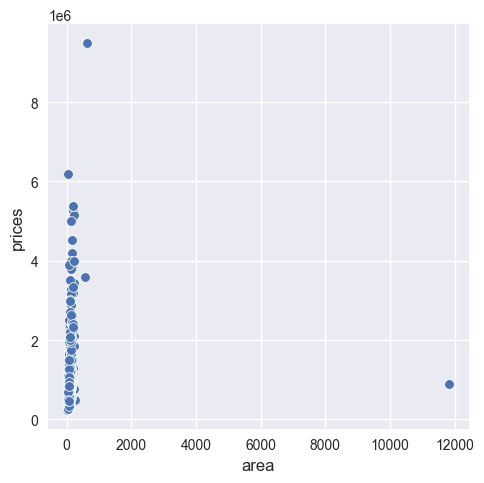

In [31]:
# Simple scatter plot to check if there is any outliers
sns.relplot(
    data=df,
    x="area", y="prices",
)

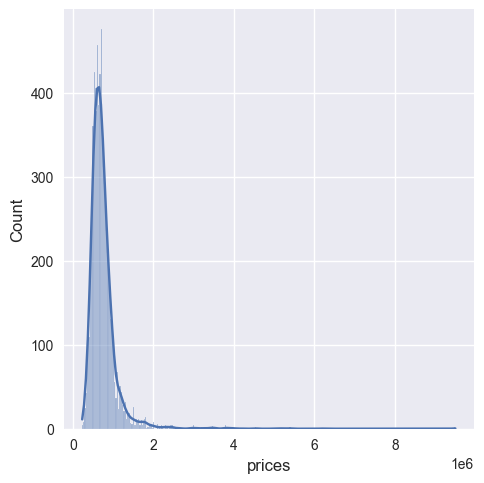

In [32]:
sns.displot(data=df, x="prices",  kde=True)

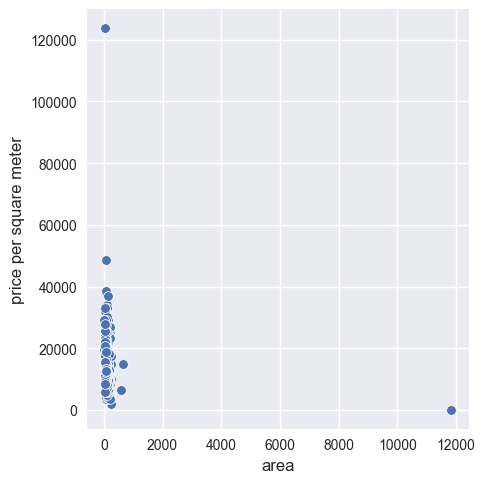

In [33]:
sns.relplot(data=df, x="area", y="price per square meter")

# Above plots shows that there are outliers so we will filter data

In [34]:
# Defining function to filter outliers using IQR rule on specific column
def filter_IQR_rule(df_to_filter, column_name: str=None):
    Q1 = df_to_filter[column_name].quantile(0.25)
    Q3 = df_to_filter[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = round(Q1 - 1.5 * IQR)
    upper_bound = round(Q3 + 1.5 * IQR)
    outliers = ((df_to_filter[column_name] < lower_bound) | (df_to_filter[column_name] > upper_bound))    
    perc_of_removed = round((100*outliers.sum())/df_to_filter.shape[0], 2)
    print(f"Removed: {outliers.sum()} rows,  {perc_of_removed}% of data, that contained outliers values in the column: '{column_name}' below {lower_bound} and above {upper_bound} ")
    df_result = df_to_filter.loc[~outliers]
    return df_result

In [35]:
# Filter outliers in 'area' column
df_filtered = filter_IQR_rule(df, column_name = "area")

Removed: 287 rows,  3.97% of data, that contained outliers values in the column: 'area' below 8 and above 107 


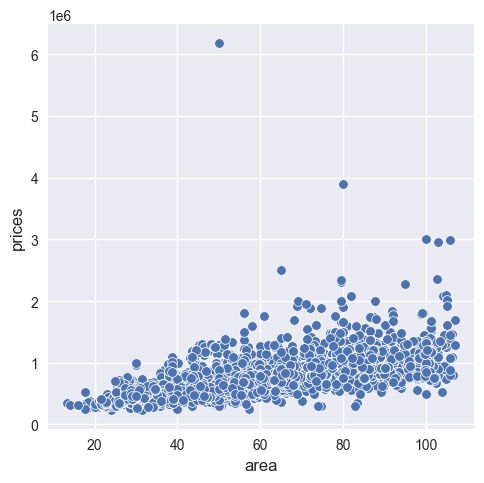

In [36]:
sns.relplot(data=df_filtered, x="area", y="prices")

In [37]:
# Filtering outliers in 'prices' column
df_filtered = filter_IQR_rule(df_filtered, column_name = "prices")

Removed: 280 rows,  4.03% of data, that contained outliers values in the column: 'prices' below 174266 and above 1175823 


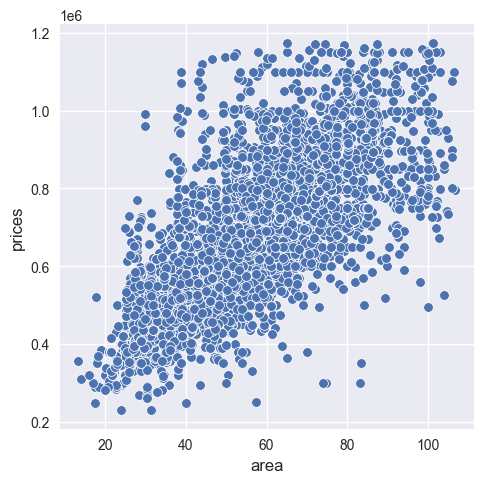

In [38]:
sns.relplot(data=df_filtered, x="area", y="prices")

In [39]:
# Filter outliers in 'price per square meter' column
df_filtered = filter_IQR_rule(df_filtered, column_name = "price per square meter")

Removed: 384 rows,  5.76% of data, that contained outliers values in the column: 'price per square meter' below 6730 and above 17642 


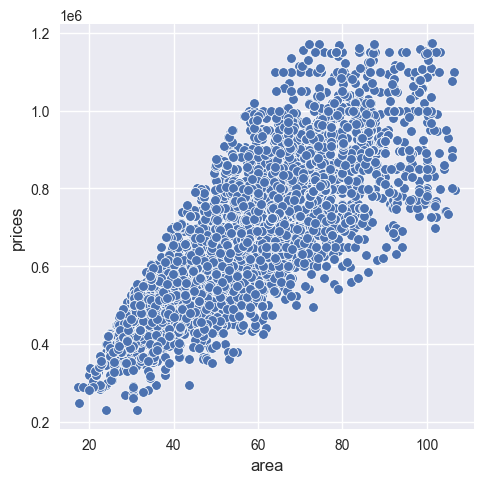

In [40]:
sns.relplot(data=df_filtered, x="area", y="prices")


# Based on the charts above, I propably over-filtered the data, so I'll go back and filter by price and area only.

In [41]:
df_filtered = filter_IQR_rule(df, column_name = "area")
df_filtered = filter_IQR_rule(df_filtered, column_name = "prices")

Removed: 287 rows,  3.97% of data, that contained outliers values in the column: 'area' below 8 and above 107 
Removed: 280 rows,  4.03% of data, that contained outliers values in the column: 'prices' below 174266 and above 1175823 


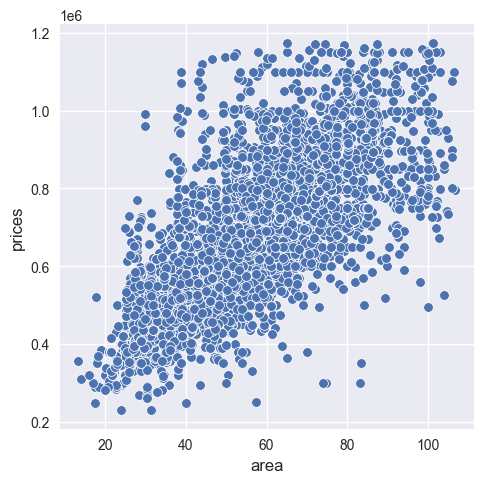

In [42]:
sns.relplot(data=df_filtered, x="area", y="prices")

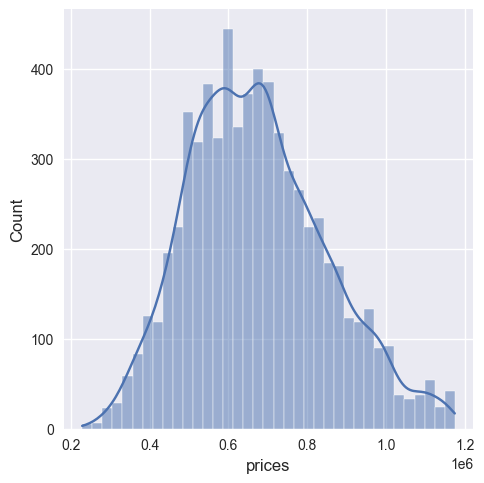

In [43]:
sns.displot(data=df_filtered, x="prices",  kde=True)

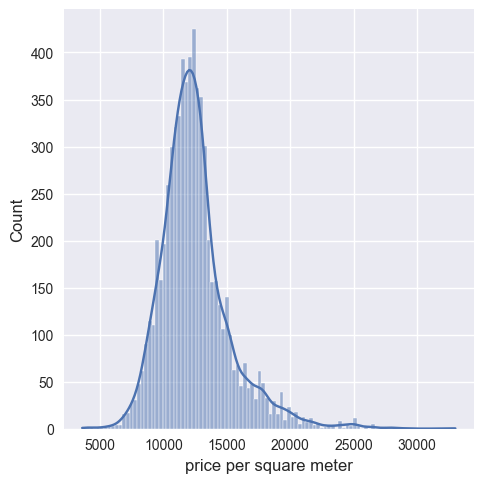

In [44]:
sns.displot(data=df_filtered, x="price per square meter",  kde=True)

# Data Cleaning

### Numbers_of_rooms

In [45]:
# Check unique values in 'numbers_of_rooms' column
df_filtered["numbers_of_rooms"].value_counts()

3    2619
2    2320
4     917
1     702
5      93
6      13
7       2
Name: numbers_of_rooms, dtype: int64

In [46]:
# Convert 'numbers_of_rooms' column to int
df_filtered["numbers_of_rooms"] = df_filtered["numbers_of_rooms"].astype(int)
# df_filtered["numbers_of_rooms"] = pd.to_numeric(df_filtered["numbers_of_rooms"], errors='coerce', downcast='signed')

### Floor

In [47]:
# Check unique values in 'floor' column
df_filtered["floor"].value_counts()

1/4         374
2/4         357
1/2         354
3/4         346
4/4         330
           ... 
suterena      1
10/16         1
8             1
1/23          1
7/17          1
Name: floor, Length: 141, dtype: int64

In [48]:
# At the start i replaced all values in column 'floor' to numeric values replacing string values with numeric values:
# df_filtered["floor"] = df_filtered["floor"].str.replace("> ","").str.replace("parter", "0").str.replace("suterena", "-4").str.replace("poddasze", "-2").astype(str)
# But for now i will not clean this column because i want to keep information as it is

In [49]:
# Define function to split information about floor and number of floors
def get_floor_number(floor_describe):
    if floor_describe != "None":
        floor_info_list = floor_describe.split("/")
        if len(floor_info_list) >= 2:
            floor = floor_info_list[0]
            number_of_floors = floor_info_list[1]
        else:
            floor = floor_info_list[0]
            number_of_floors = None
    else:
        floor = None
        number_of_floors = None

    return floor, number_of_floors

In [50]:
# Splite information about floor and number of floors 
df_filtered[["floor", "number_of_floors"]] = df_filtered["floor"].apply(lambda x: pd.Series(get_floor_number(x)))

In [51]:
# Check unique values in 'floor' column
df_filtered["floor"].value_counts()

1           1525
2           1264
parter      1231
3            976
4            728
5            319
6            239
Zapytaj      102
7             96
8             64
> 10          57
10            34
9             26
suterena       4
poddasze       1
Name: floor, dtype: int64


### I checked the conversion to numeric values, but there are some string values like basement and attic, so decided to use OHE to keep the full information. 

### Amount of rent

In [52]:
# Check unique values in 'amount_of_rent' column
df_filtered["amount_of_rent"].value_counts()

Zapytaj      3956
500 zł        258
600 zł        208
400 zł        197
700 zł        146
             ... 
973 zł          1
251,67 zł       1
869 zł          1
677 zł          1
495 zł          1
Name: amount_of_rent, Length: 305, dtype: int64

In [53]:
# Clean of column 'amount_of_rent'
df_filtered["amount_of_rent"] = df_filtered["amount_of_rent"].str.replace(" zł","").str.replace(" ", "").str.replace(",", ".")
# Convert type of column 'amount_of_rent' to numeric
df_filtered["amount_of_rent"] = pd.to_numeric(df_filtered["amount_of_rent"], errors="coerce")

In [54]:
# Display random 10 rows of 'amount_of_rent' column
df_filtered["amount_of_rent"].sample(10)

3123    10.00
5812      NaN
1034      NaN
94        NaN
5063   490.00
2893      NaN
5121      NaN
2104   550.00
593    574.00
6189      NaN
Name: amount_of_rent, dtype: float64

In [55]:
# Part of missing values in 'amount_of_rent' column
round(df_filtered["amount_of_rent"].isnull().sum()* 100 / len(df_filtered["amount_of_rent"]), 2)

59.35

###  This column is missing almost 60% of values, I probably won't use this column for regression

In [56]:
# Check unique values in 'year_of_construction' column
df_filtered["year_of_construction"].value_counts()

brak informacji    1946
2023               1232
2024                678
2022                297
2025                264
                   ... 
1988                  1
1953                  1
1903                  1
1870                  1
1964                  1
Name: year_of_construction, Length: 128, dtype: int64

In [57]:
# Check if there is any rows with missing values in 'year_of_construction' column and with information about primary_secondary
((df_filtered["primary_secondary"] == "pierwotny") & (df_filtered["year_of_construction"] == "brak informacji")).sum()

385

In [58]:
# Fill missing values in 'year_of_construction' column for entities wich are from primary market
df_filtered.loc[((df_filtered["primary_secondary"] == "pierwotny") & (df_filtered["year_of_construction"] == "brak informacji")), "year_of_construction"] = "2023"

In [59]:
# Convert type of column 'year_of_construction' to numeric but with raise error if there is any string value to check them 
df_filtered["year_of_construction"] = pd.to_numeric(df_filtered["year_of_construction"], errors='raise')

ValueError: Unable to parse string "brak informacji" at position 1

In [60]:
# Convert type of column 'year_of_construction' to numeric but with coerce error to change string values to NaN
pd.to_numeric(df_filtered["year_of_construction"], errors="coerce").value_counts()

2,023.00    1617
2,024.00     678
2,022.00     297
2,025.00     264
1,980.00     170
            ... 
1,988.00       1
1,953.00       1
1,903.00       1
1,870.00       1
1,964.00       1
Name: year_of_construction, Length: 127, dtype: int64

### Cleaning of column 'year_of_construction' and its discretization

In [61]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") > 2030]["year_of_construction"]

1067    20233
2986    20223
3625    20223
Name: year_of_construction, dtype: object

In [62]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") > 2030, "year_of_construction"] = 2023

In [63]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") < 1900 , "year_of_construction"] = "x<1900"

In [64]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") < 1990, "year_of_construction"] = "1900<x<1990"

In [65]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") < 2010, "year_of_construction"] = "1990<x<2010"

In [66]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") < 2018, "year_of_construction"] = "2010<x<2018"

In [67]:
df_filtered.loc[pd.to_numeric(df_filtered["year_of_construction"], errors="coerce") >= 2018, "year_of_construction"] = "2018<=x"

In [68]:
df_filtered["year_of_construction"].value_counts()

2018<=x            3118
brak informacji    1561
1900<x<1990        1083
2010<x<2018         453
1990<x<2010         426
x<1900               25
Name: year_of_construction, dtype: int64

In [69]:
# Checking statistics for  cleaned numerical columns
df_filtered.describe()

,prices,area,price per square meter,numbers_of_rooms,amount_of_rent
count,"6,666.00","6,666.00","6,666.00","6,666.00","2,710.00"
mean,"673,031.95",55.74,"12,517.22",2.61,550.26
std,"174,803.92",16.78,"2,783.67",0.91,321.87
min,"228,900.00",13.43,"3,602.00",1.00,1.00
25%,"542,504.25",44.00,"10,822.00",2.00,400.00
50%,"659,065.00",54.95,"12,159.50",3.00,526.11
75%,"786,000.00",65.84,"13,550.00",3.00,680.00
max,"1,175,000.00",106.68,"33,000.00",7.00,"13,000.00"


### location

In [70]:
# Display random 10 rows of 'location' column
df_filtered['location'].sample(10)

5009       ['Borek', 'Krzyki', 'Wrocław', 'dolnośląskie']
420     ['ul. Konstantego Ildefonsa Gałczyńskiego', 'O...
1701     ['Jagodno', 'Krzyki', 'Wrocław', 'dolnośląskie']
1191    ['ul. Perkusyjna', 'Wojnów', 'Psie Pole', 'Wro...
3405    ['ul. Blizanowicka', 'Księże', 'Krzyki', 'Wroc...
4990    ['Tarnogaj', 'Krzyki', 'Wrocław', 'dolnośląskie']
1326    ['ul. Przyjaźni', 'Krzyki', 'Krzyki', 'Wrocław...
1251    ['ul. Kotlarska', 'Stare Miasto', 'Stare Miast...
1580       ['Borek', 'Krzyki', 'Wrocław', 'dolnośląskie']
5818    ['ul. Adama Jerzego Czartoryskiego', 'Poświętn...
Name: location, dtype: object

In [71]:
# Column 'location' contains information about district, city, province and other. I will split this column into 4 columns
df_filtered["location"] = df_filtered["location"].str.replace("[","", regex=True).str.replace("]","", regex=True).str.replace("'","", regex=True)
df_filtered[["location_remain", "district", "city", "province"]] = df_filtered["location"].str.rsplit(", ",n=3, expand=True)

### balcon_garden_terrace

In [72]:
# Define function to split information about balcon, garden and terrace
def get_dummy_for(df, column_name):
    df[column_name] = df[column_name].str.replace(", ",",").str.strip()
    df[column_name] = df[column_name].apply(lambda x: unidecode(x) if x is not None else None)
    df[column_name] = df[column_name].str.replace(" ", "_")
    df.loc[df[column_name] == "None", column_name] = np.nan
    df.loc[df[column_name] == "nan", column_name] = np.nan
    df_encoded = df[column_name].str.get_dummies(sep=',').add_prefix(f"{column_name}_dummy_")
    df = pd.concat([df, df_encoded], axis=1)
    return df

In [73]:
# Get dummy information about balcon, garden and terrace
df_filtered = get_dummy_for(df_filtered, "balcon_garden_terrace")

### utilites

In [74]:
# Get dummy information about utilities
df_filtered = get_dummy_for(df_filtered, "utilities")

### security

In [75]:
# Get dummy information about security
df_filtered = get_dummy_for(df_filtered, "security")

In [76]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6666 entries, 0 to 7232
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   titles                                      6666 non-null   object 
 1   prices                                      6666 non-null   float64
 2   location                                    6666 non-null   object 
 3   area                                        6666 non-null   float64
 4   price per square meter                      6666 non-null   int64  
 5   numbers_of_rooms                            6666 non-null   int32  
 6   urls                                        6666 non-null   object 
 7   property_ownership                          6666 non-null   object 
 8   condition_of_property                       6666 non-null   object 
 9   floor                                       6666 non-null   object 
 10  balcon_garde

## Saving cleaned data to csv file

In [77]:
df_filtered.to_csv(f"{URL}_cleaned_up", index=False, sep=",", encoding="utf-8")

# Building a simple model as a reference

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn import linear_model

In [79]:
# Target variable
y = df_filtered["prices"]

In [80]:
y.head()

0   759,000.00
1   616,161.00
2   576,000.00
3   470,000.00
4   633,000.00
Name: prices, dtype: float64

In [81]:
# Defining features
X = df_filtered.drop(["prices", "price per square meter"], axis=1)
X = X.drop(["titles", "urls", "describe", "location", "location_remain", "city", "province","utilities", "balcon_garden_terrace", "security"], axis=1)

In [82]:
# Splite data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [83]:
# Get list of categorical columns  
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols 

Index(['property_ownership', 'condition_of_property', 'floor', 'parking_space',
       'type_of_heating', 'primary_secondary', 'seller',
       'year_of_construction', 'type_of_development', 'window', 'lift',
       'home_furnishings', 'additional_info', 'bulding_material',
       'number_of_floors', 'district'],
      dtype='object')

In [84]:
# Get list of numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols =  X_train.select_dtypes(include=numerics).columns
numerical_cols

Index(['area', 'numbers_of_rooms', 'amount_of_rent',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_terrace_dummy_taras', 'utilities_dummy_brak_informacji',
       'utilities_dummy_gaz', 'utilities_dummy_internet',
       'utilities_dummy_kanalizacja', 'utilities_dummy_prad',
       'utilities_dummy_telefon', 'utilities_dummy_telewizja_kablowa',
       'utilities_dummy_woda', 'security_dummy_brak_informacji',
       'security_dummy_domofon_/_wideofon',
       'security_dummy_drzwi_/_okna_antywlamaniowe',
       'security_dummy_monitoring_/_ochrona',
       'security_dummy_rolety_antywlamaniowe',
       'security_dummy_system_alarmowy', 'security_dummy_teren_zamkniety'],
      dtype='object')

In [85]:
# Check if there is any missing column
len(numerical_cols) + len(categorical_cols) == len(X_train.columns)

True

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 1724 to 2908
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   area                                        5332 non-null   float64
 1   numbers_of_rooms                            5332 non-null   int32  
 2   property_ownership                          5332 non-null   object 
 3   condition_of_property                       5332 non-null   object 
 4   floor                                       5332 non-null   object 
 5   amount_of_rent                              2168 non-null   float64
 6   parking_space                               5332 non-null   object 
 7   type_of_heating                             5332 non-null   object 
 8   primary_secondary                           5332 non-null   object 
 9   seller                                      5332 non-null   object 
 10  year_of_c

In [87]:
# Preprocesor for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'constant')),
    ('std_scaler', StandardScaler())
])

In [88]:
# Preprocesor for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [89]:
# Bundle preprocesors for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [90]:
# Bundle preprocesor and model in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', linear_model.LinearRegression())])

In [91]:
# Fit model 
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['area', 'numbers_of_rooms', 'amount_of_rent',
       'balcon_garden_terrace_dummy_Zapytaj',
       'balcon_garden_terrace_dummy_balkon',
       'balcon_garden_terrace_dummy_ogrodek',
       'balcon_garden_...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['property_ownership', 'condition_of_property', 'floor', 'parking_space',
       'type_of_heating', 'primary_secondary', 'seller',
       'year_of_construction', 'type_of_development', 'window', 'lift',
       'home_furnishings', 'additional_info', 'bulding_material',
       'number_of_floors', 'district'],
      dtype='object'))])),
                ('model', LinearRegression())])

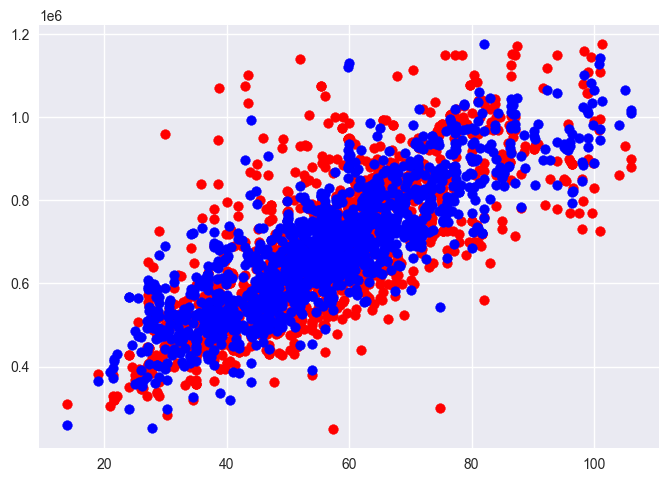

In [92]:
# Visualise the regression model results
X_grid=np.arange(min(X_valid["area"]),max(X_valid["area"]),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_valid["area"], y_valid, color='red')
plt.scatter(X_valid["area"], my_pipeline.predict(X_valid),color='blue')

plt.show()

In [93]:
# MAE and R2 score for training set
print('MAE: '+ str(mean_absolute_error(y_train, my_pipeline.predict(X_train))))
print("Coefficient of determination: %.2f" % r2_score(y_train, my_pipeline.predict(X_train)))


MAE: 62072.0478046353
Coefficient of determination: 0.76


In [94]:
# MAE and R2 score for validation set
print('MAE: '+ str(mean_absolute_error(y_valid, my_pipeline.predict(X_valid))))
print("Coefficient of determination: %.2f" % r2_score(y_valid, my_pipeline.predict(X_valid)))

MAE: 62201.2073219977
Coefficient of determination: 0.76
